______

## Google Earth Engine Tutorial
### Data loading
_____

GEE provides a javascript interface where users can manage their assets, create scripts and visualize results. This interface is available in [GEE] https://code.earthengine.google.com/ Although we will use the python API of GEE, in this part of the tutorial we will use the javascript interface to load data. Later on, we will learn how to do it programatically. 


#### Overview of GEE web interface

We can distinguish 4 main areas as the image below shows. 
1. Left panel. Here we have three tabs: <i>scripts</i>, <i>asset</i> and <i>docs</i>. 
2. Middle panel. A script editor.
3. Right panel. It consist of three tabs: <i>Inspector</i>, <i>console</i> and <i>tasks</i>. 
4. Map area. We can add visualize data it in this section or edit features.<br> 

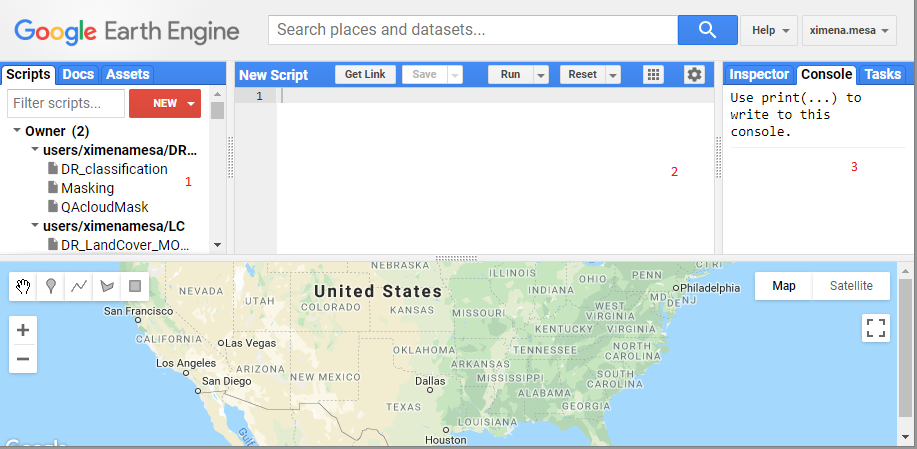

#### Loading an image

GEE has a large amount of Earth data free available for researchers. However, sometimes we need to process our own data.To add our images in GEE. We will create a new folder **tutorial**.
![alt text](./images/create_folder_gee2.png "Create a folder in GEE")

In [1]:
We will load the image *subset.tif* that is a subset of a Worldview-2 image and it was acquired in 2014.
Load the image in your GEE asset as can be seen in the image below. For now, keep the default options.
![alt text](./images/insert_image.png "Insert image in the tutorial folder")


SyntaxError: invalid syntax (<ipython-input-1-d5bb5ea20768>, line 1)

Now that we can see the image loaded in the asset manager and look at its preview by clicking over it. <br>
![alt text](./images/view_image_asset.png "Insert image in the tutorial folder")

Besides of the preview, the window displays name, id,  date, size, date of last modification and properties, if any, of the image. Per each band, we can observe the correspoding index, name, data type and dimensions in pixels.   A more comprehensive metadata information can be obtained by using *getInfo()* as we can see in the following example:

In [2]:
# import pretty print package
import pprint
# import earth engine (ee) python package
import ee 
# Initialize the Earth Engine object, using the authentication credentials.
ee.Initialize() 
# load the image 
image = ee.Image("users/rosamaguilar/tutorial/subset")
# print metadata
pprint.pprint(image.getInfo(), indent = 0.2, compact = True )
# please note that we should use getInfo to retrieve the value of a variable or object. 

EEException: Image.load: Image asset 'users/rosamaguilar/tutorial/subset' not found.

In [2]:
#List name of bands
print(image.bandNames().getInfo())

['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8']


In [3]:
# print CRS information of the image 
pprint.pprint(image.projection().getInfo())
# Retrieve scale of the image from its projecton
imScale = image.projection().nominalScale()
print('Image scale: ', imScale.getInfo())
# for more information about scale in GEE, see the document: https://developers.google.com/earth-engine/scale

{'crs': 'EPSG:32630',
 'transform': [2.0009777545928955,
               0.0,
               260323.03819620793,
               0.0,
               -2.0009777545928955,
               1346325.1740949643],
 'type': 'Projection'}
Image scale:  2.0009777545928955


We will use this image later on for visualisation and other operations. 

#### Loading vector data 

A *feature* is defined in GEE as a  [GeoJSON feature object](https://tools.ietf.org/html/rfc7946#section-3.2). This means that a feature is spatially bounded with *geometry* (can be null), *properties* and *id*. A *feature collection* in GEE is used to group a collection of related features. A *feature collection* may contain features, properties and other collections. 

There are several ways to create a feature collection. In this example we will load a data table [fusion table (ft)](fusiontables.google.com) into a feature collection.  A ft can be created from CSV, KML files, spreadsheets (.xls, .xlsx, .ods and google), and other text-delimited files. After creating a fusion table we can use its id to create a GEE feature collection as can be see below. Shapefiles can also be uploaded to GEE <br>

In [4]:
# Load feature collection from the fusion table 
fc = ee.FeatureCollection ('ft:1K41m-umQ1K8Ys-9bVTqoEYzwKD6xEzIVTPELdVkK')

In [5]:
# getting information about the Feature collection
pprint.pprint(fc.getInfo())

{'columns': {'class': 'Number',
             'description': 'String',
             'id': 'Number',
             'name': 'String'},
 'features': [{'geometry': {'coordinates': [[[-5.199613999999999,
                                              12.165225000000001],
                                             [-5.1990310000000015, 12.165136],
                                             [-5.198975, 12.165533],
                                             [-5.199543, 12.165571],
                                             [-5.199613999999999,
                                              12.165225000000001]]],
                            'geodesic': True,
                            'type': 'Polygon'},
               'id': '2',
               'properties': {'class': 5.0,
                              'description': '',
                              'id': 1.0,
                              'name': ''},
               'type': 'Feature'},
              {'geometry': {'coordinates': [[[-5.201

In [6]:
# listing the attributes in the feature collection
print(fc.first().propertyNames().getInfo())

['name', 'description', 'id', 'class', 'system:index']


In [7]:
# getting information about one feature (the first)
pprint.pprint(fc.first().getInfo())

{'geometry': {'coordinates': [[[-5.199613999999999, 12.165225000000001],
                               [-5.1990310000000015, 12.165136],
                               [-5.198975, 12.165533],
                               [-5.199543, 12.165571],
                               [-5.199613999999999, 12.165225000000001]]],
              'geodesic': True,
              'type': 'Polygon'},
 'id': '2',
 'properties': {'class': 5.0, 'description': '', 'id': 1.0, 'name': ''},
 'type': 'Feature'}


This feature collection will be used in following sections. More details about size and file types in fusion tables can be found [here] (https://support.google.com/fusiontables/answer/171181)